# About the Project 


# Heart Disease Prediction<b/><br/>
<b/>Abstract<br/>
Heart disease is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medicine, as it is one of the leading diseases related to an unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or aversion.
<br/>

<b/>Problem Statement:<br/>
Analyze the heart disease dataset to explore the machine learning algorithms and build decision tree model to predict the disease.
<br/>
<br/>
<b/>Dataset Information:
Each attribute in the heart disease dataset is a medical risk factor
<br/>

# Importing the Necessary Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Importing Data Set 

In [2]:
data = pd.read_csv("HeartDisease.csv")

In [3]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Understanding the category 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Segregating the dependent variable

In [7]:
y_dep = data["target"]

In [8]:
# Segregating the numerical and categorical variables 

In [9]:
num_data = pd.DataFrame(data=data ,columns=["age","rest_bps","cholestrol","thalach","old_peak"])

In [10]:
num_data

,age,rest_bps,cholestrol,thalach,old_peak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [11]:
cat_var = pd.DataFrame(data=data,columns=["gender","chest_pain","fasting_blood_sugar","rest_ecg","exer_angina","slope","ca","thalassemia"])

In [12]:
cat_var

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3
299,1,3,0,1,0,1,0,3
300,1,0,1,1,0,1,2,3
301,1,0,0,1,1,1,1,3


# Checking for the null values in the data


In [13]:
# categorical variable 
cat_var.isna().sum()

gender                 0
chest_pain             0
fasting_blood_sugar    0
rest_ecg               0
exer_angina            0
slope                  0
ca                     0
thalassemia            0
dtype: int64

In [14]:
# numerical Variable 
num_data.isna().sum()

age           0
rest_bps      0
cholestrol    0
thalach       0
old_peak      0
dtype: int64

In [15]:
# Prevalance rate of the Dependent Variable 

In [16]:
y_dep.value_counts()

1    165
0    138
Name: target, dtype: int64

In [17]:
# The data is a balanced data so we neednt perfor the SMOTE test

# EDA 

In [18]:
# regressionplot plot for the numerical variable 

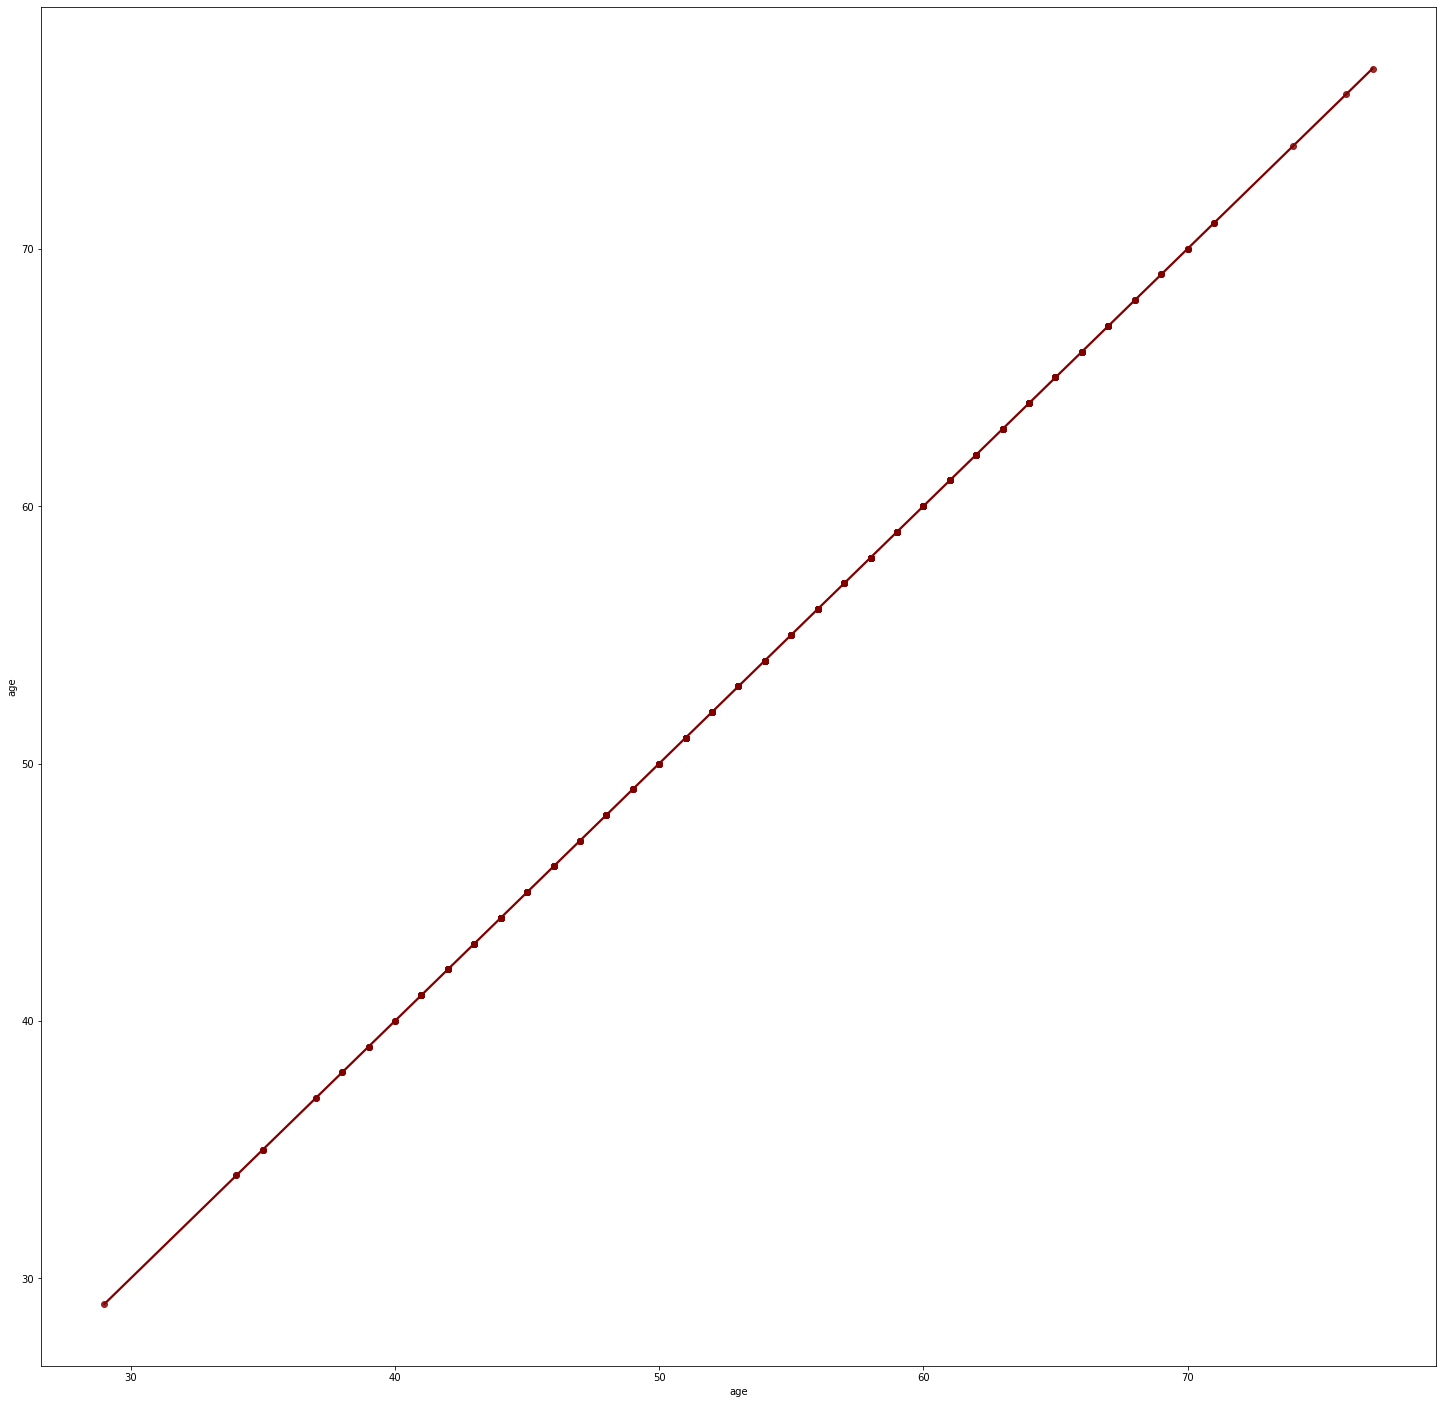

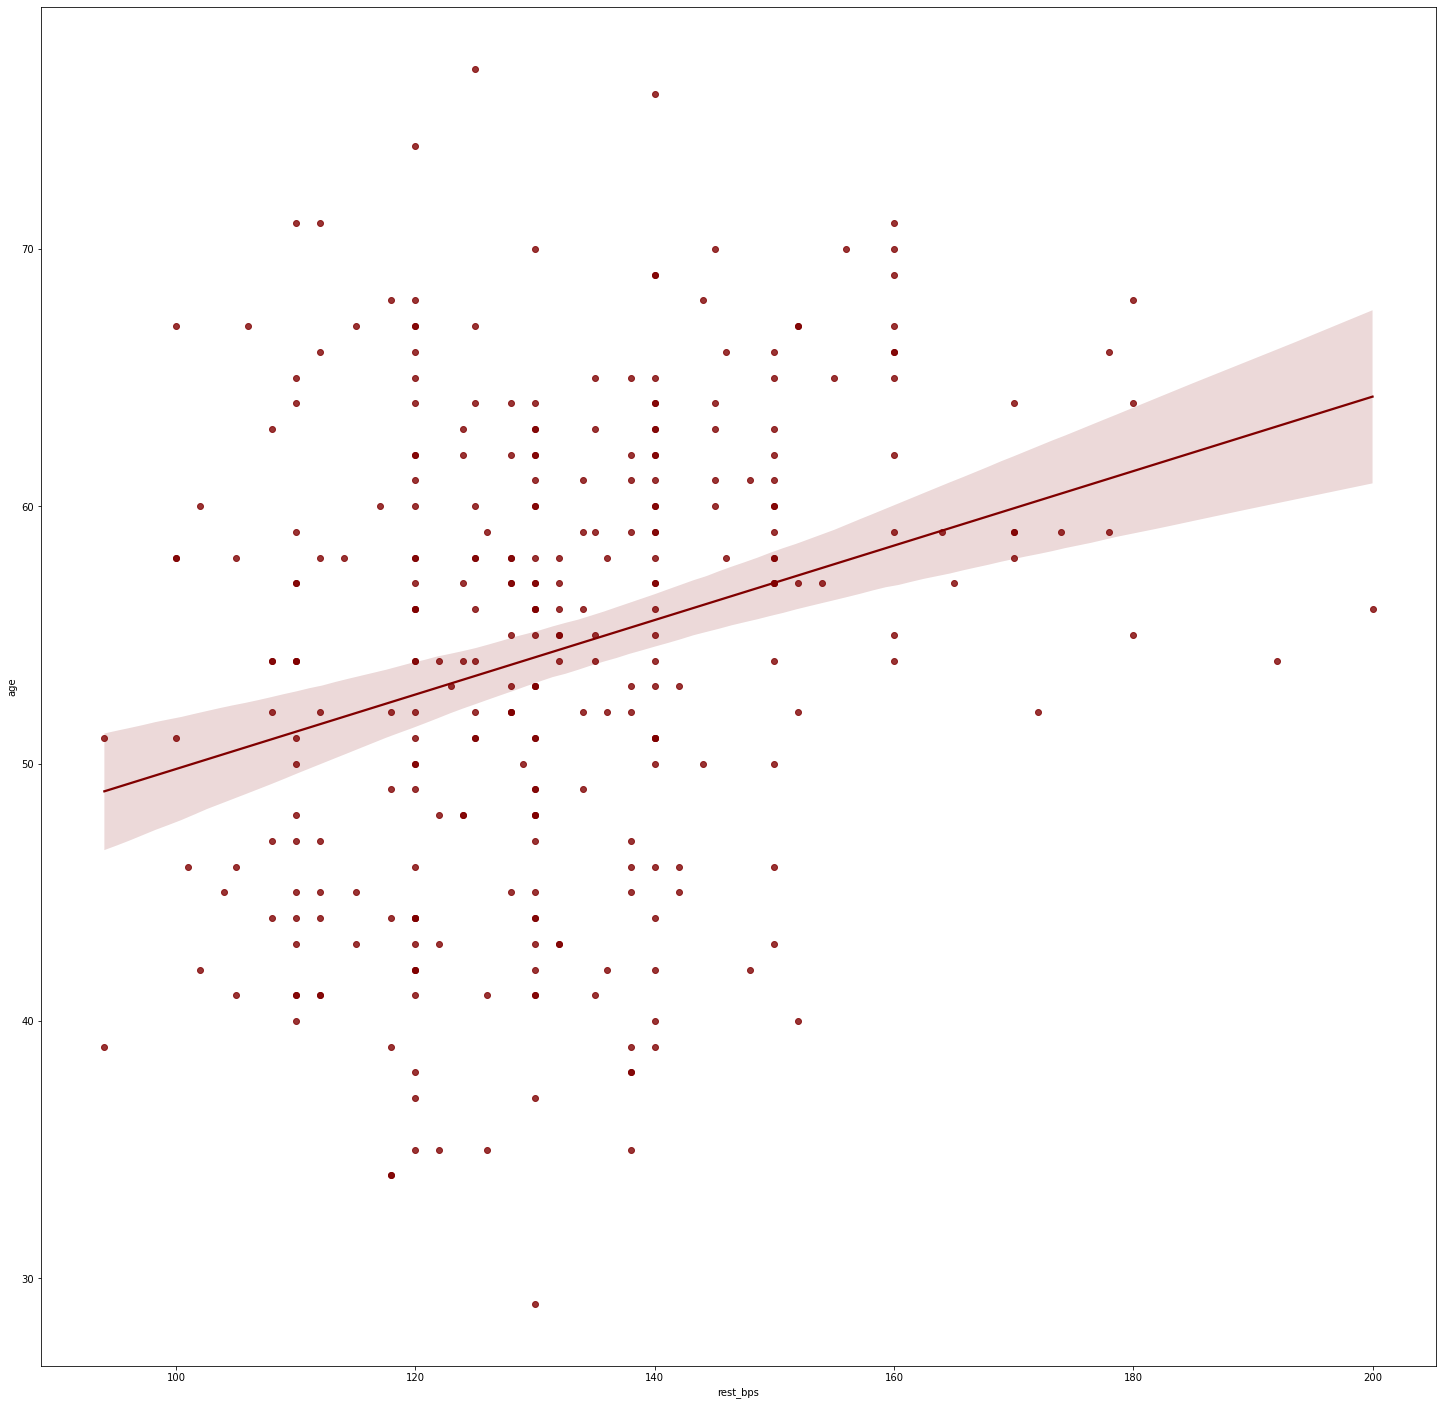

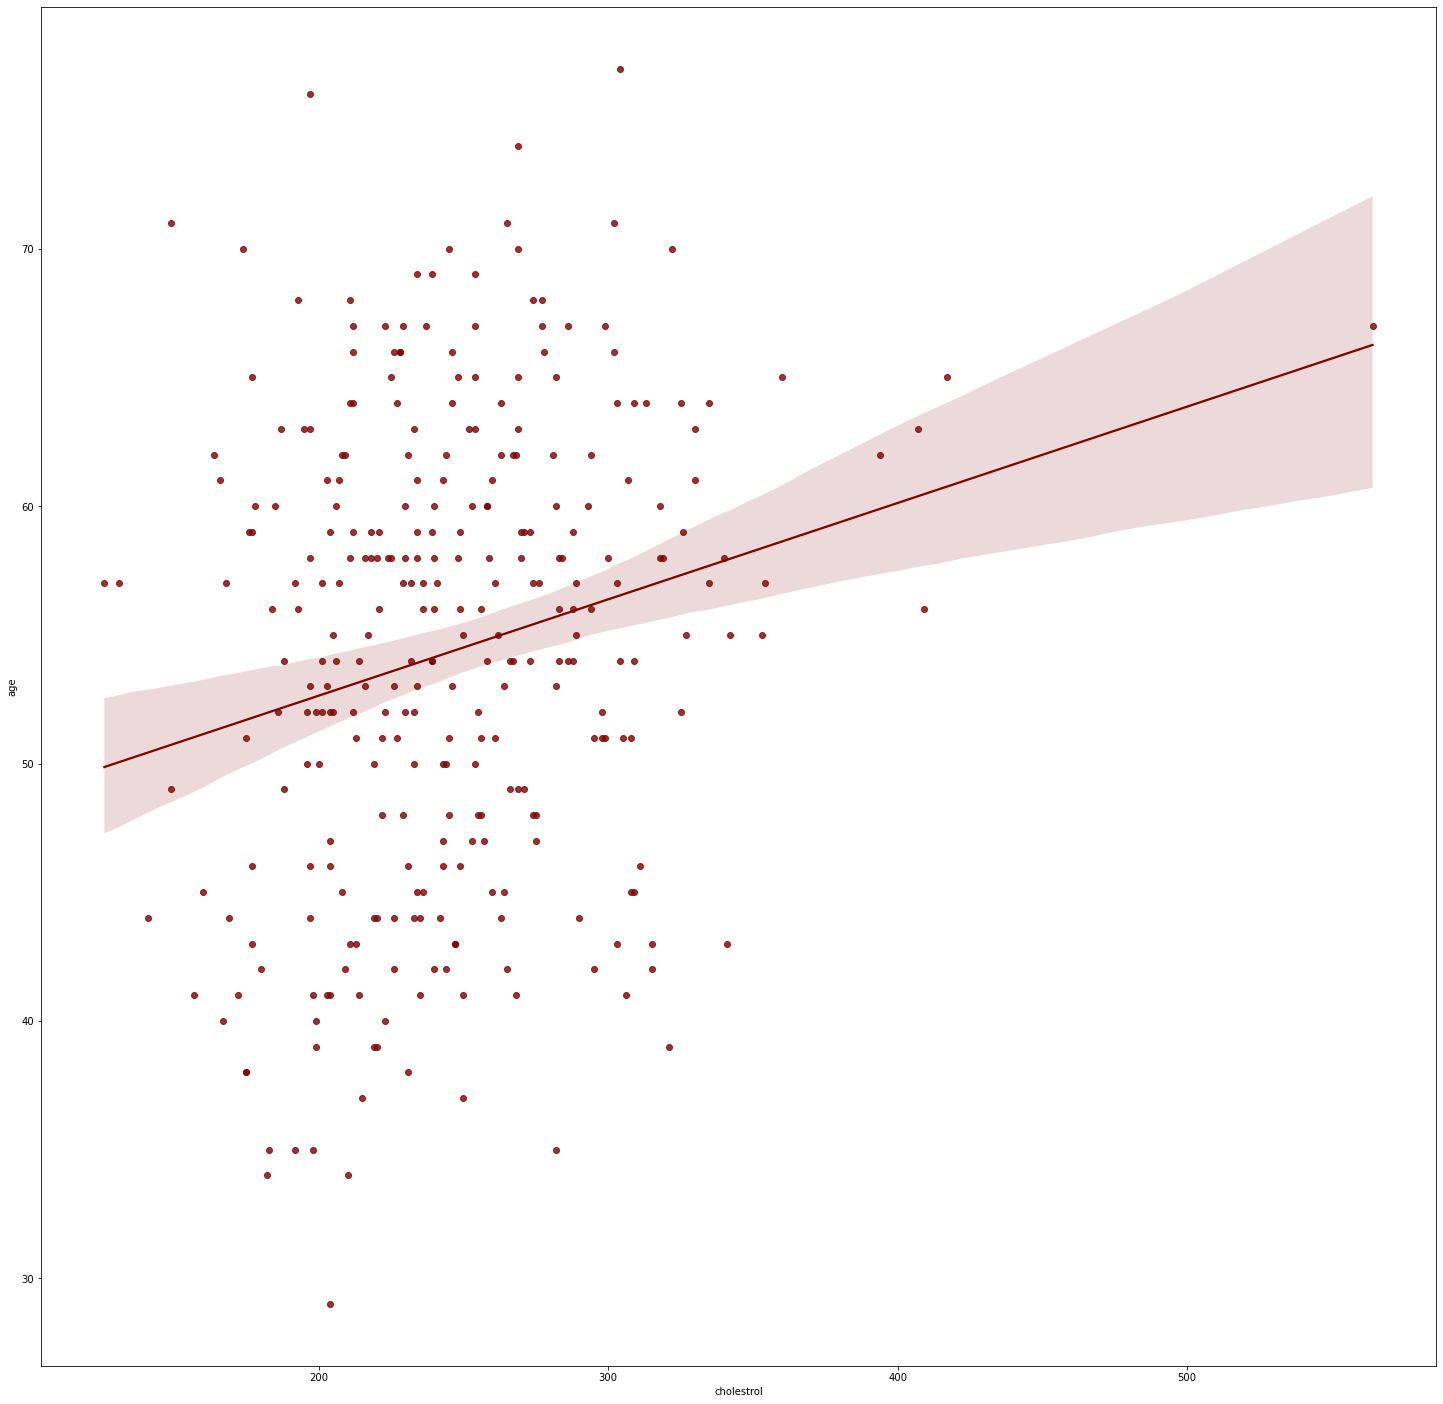

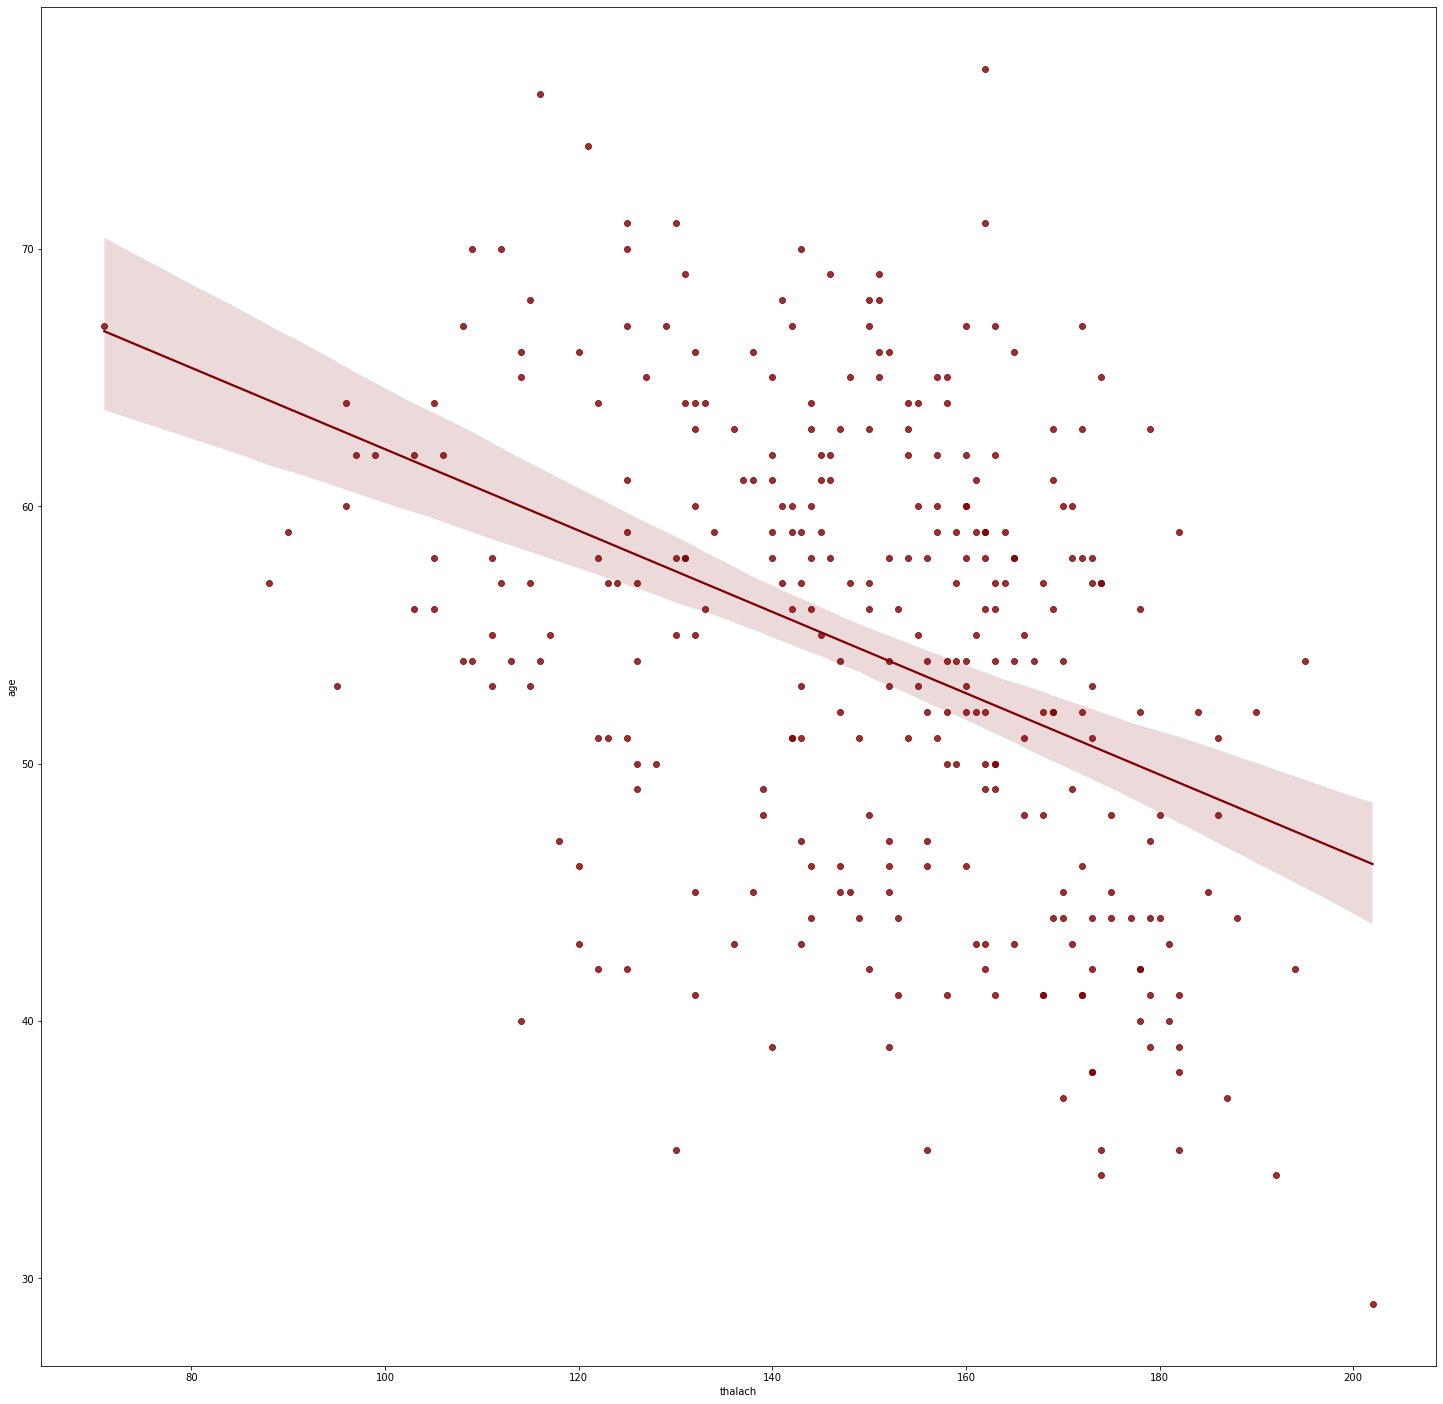

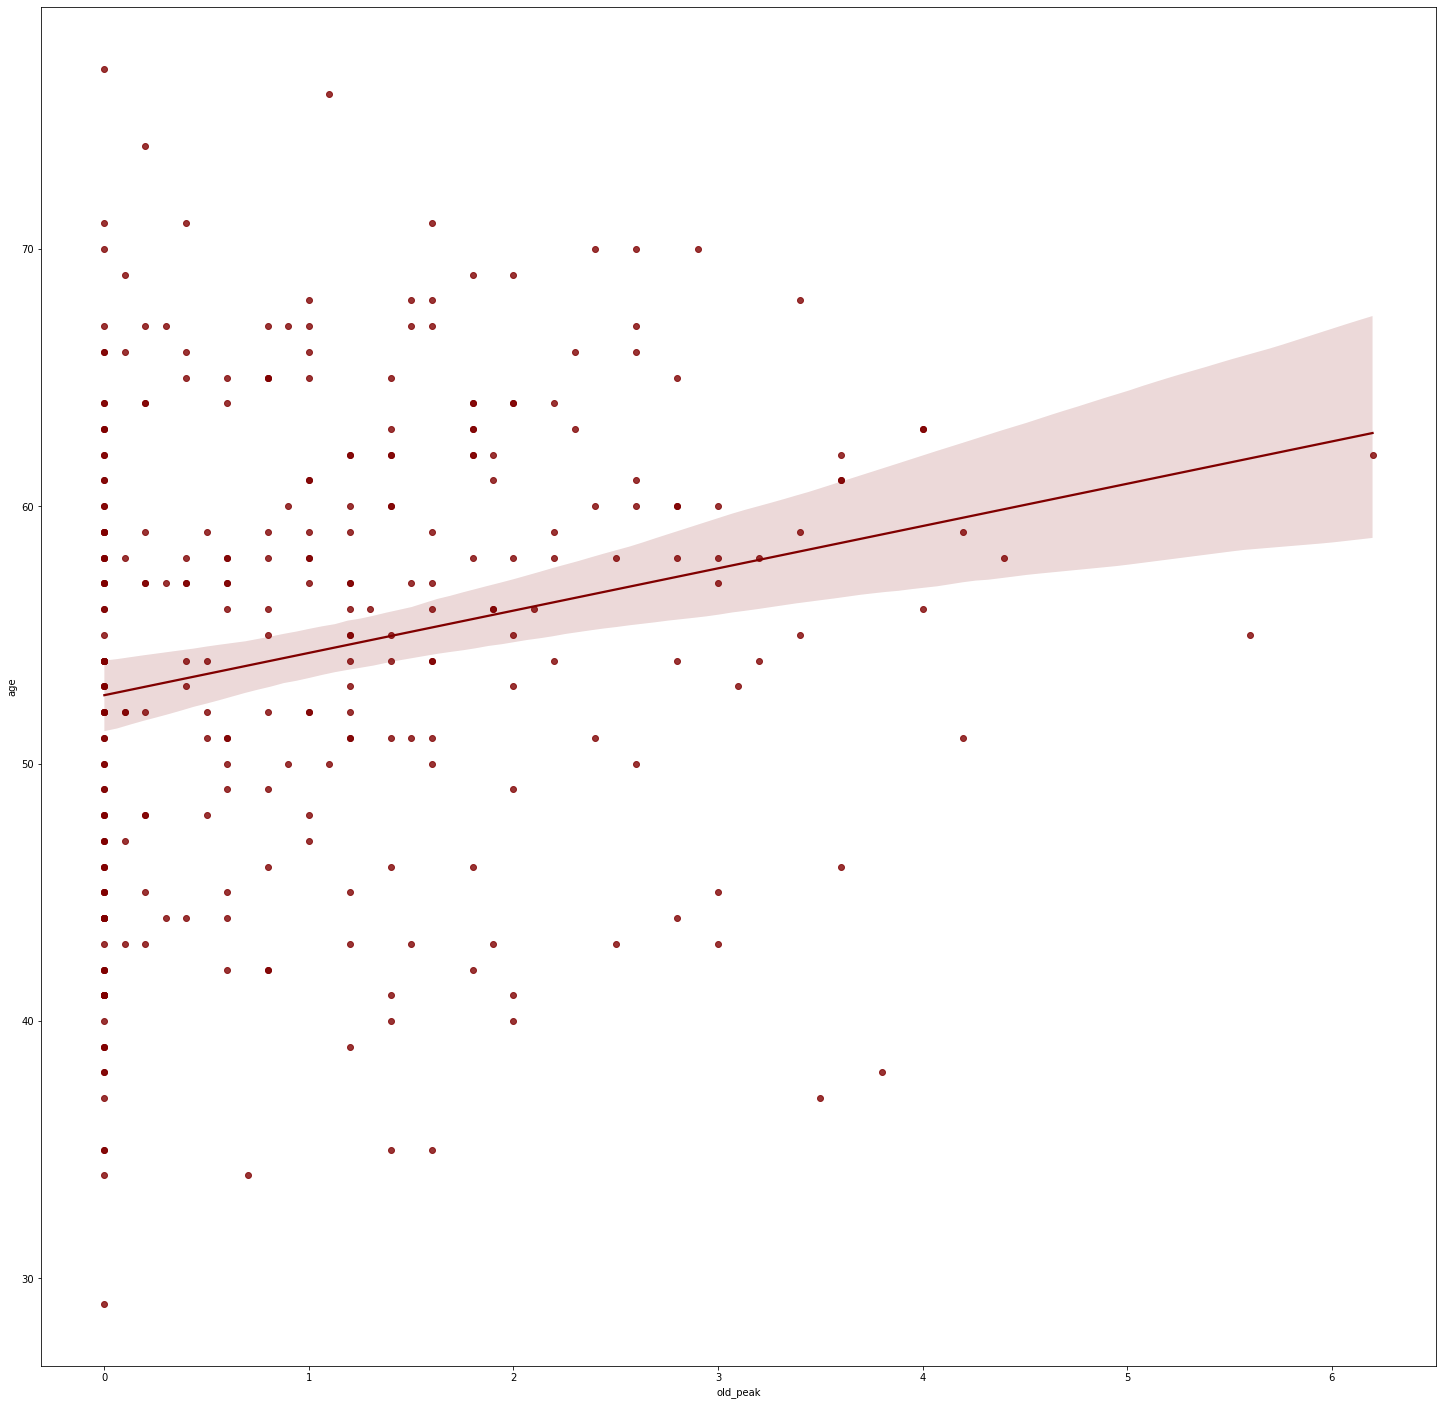

In [19]:
for i in num_data.columns:
    plt.figure(figsize=[25,25])
    sns.regplot(x=num_data[i],y=data["age"],color="maroon")
    plt.show()

Inference :  The relationship shows non linearity 

In [20]:
# Outlier Removal if any 

C:\Users\Khannchan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


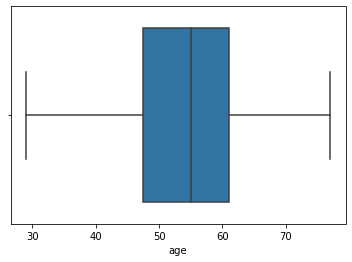

C:\Users\Khannchan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


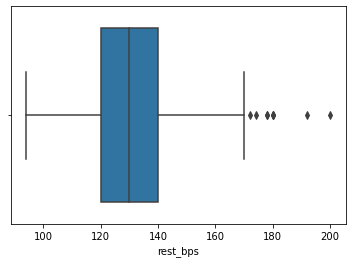

C:\Users\Khannchan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


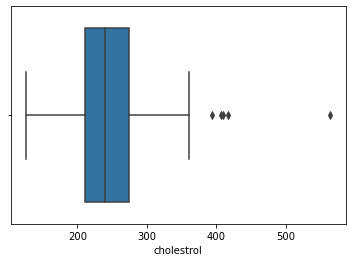

C:\Users\Khannchan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


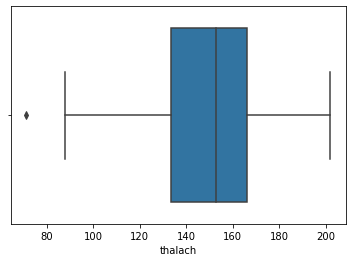

C:\Users\Khannchan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


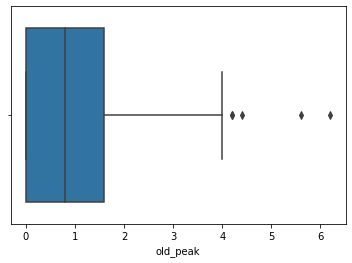

In [21]:
for i in num_data.columns:
    sns.boxplot(data[i])
    plt.show()

In [22]:
# Removing Outlier using the Candle Stick MEthod 

In [23]:
for values in num_data.columns:
    
    q1 = np.percentile( num_data[values], 25, interpolation = 'midpoint')
    q3 = np.percentile( num_data[values], 75, interpolation = 'midpoint')
    
    iqr= q3-q1
    
    num_data[values].drop(num_data[(num_data[values]>=(q3+1.5*iqr))|(num_data[values]<=(q1-1.5*iqr))].index,inplace=True)
                
                

C:\Users\KHANNC~1\AppData\Local\Temp/ipykernel_20388/1452507225.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile( num_data[values], 25, interpolation = 'midpoint')
C:\Users\KHANNC~1\AppData\Local\Temp/ipykernel_20388/1452507225.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.percentile( num_data[values], 75, interpolation = 'midpoint')


In [24]:
# Checking if the numerical variables have correlation
cor = num_data.corr()

<AxesSubplot:>

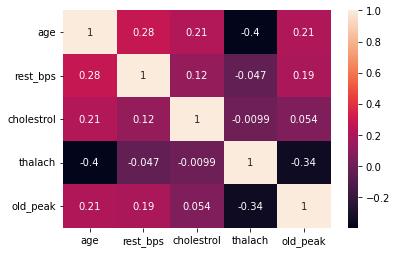

In [25]:
sns.heatmap(cor,annot=True)

In [26]:
# they are not correlated 

In [27]:
# Plotting the pair plot for the numerical featuress

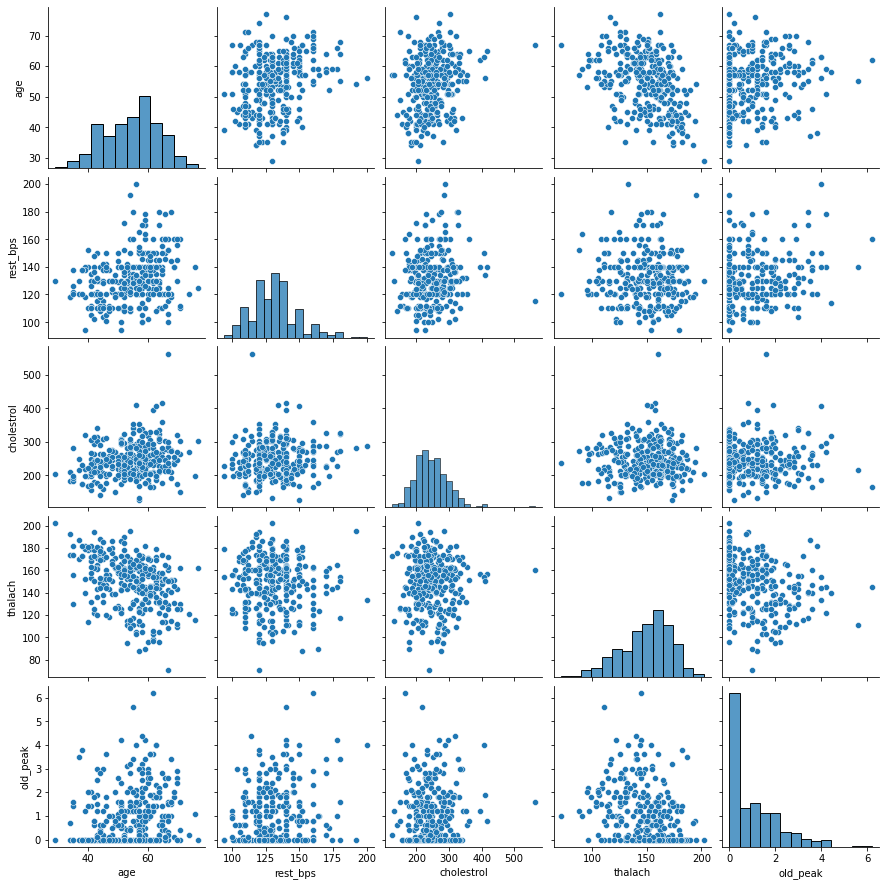

In [28]:
sns.pairplot(num_data)

In [29]:
# Checking the normality for the numerical variables 

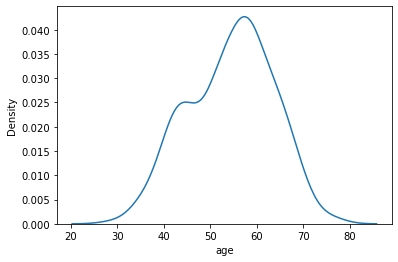

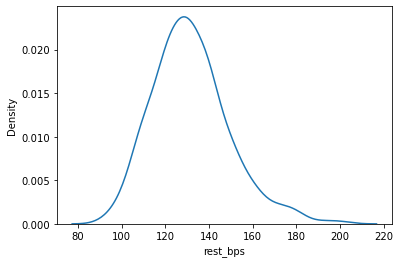

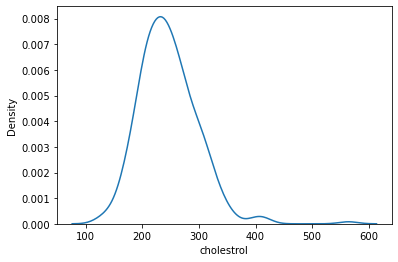

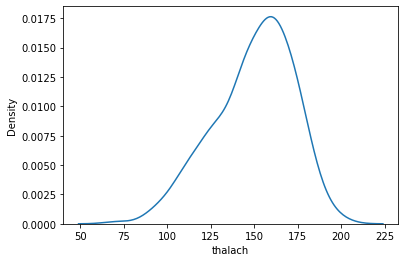

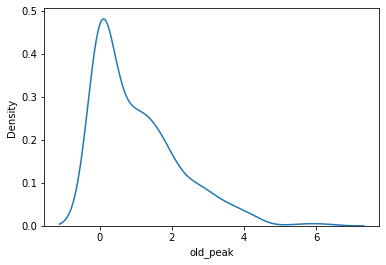

In [30]:
for i in num_data.columns:
    sns.kdeplot(num_data[i])
    plt.show()

In [31]:
# Analysis for the categorical variables 

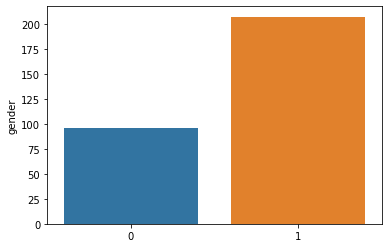

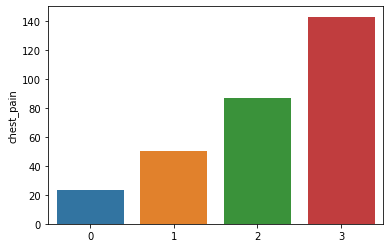

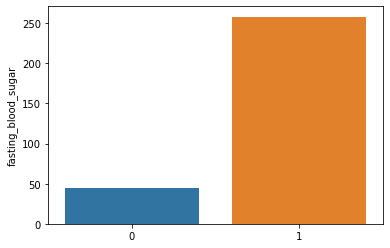

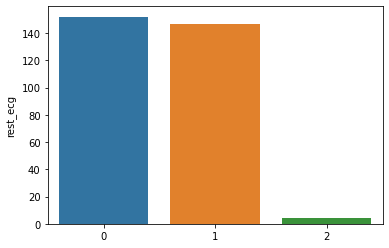

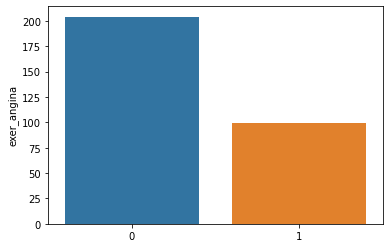

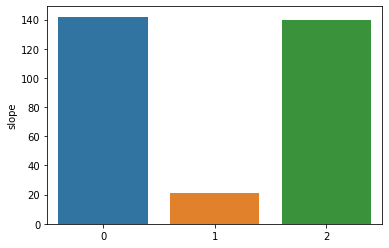

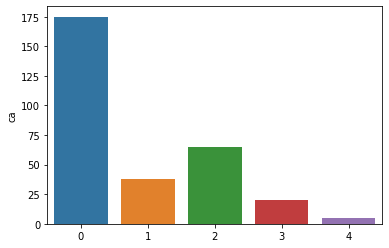

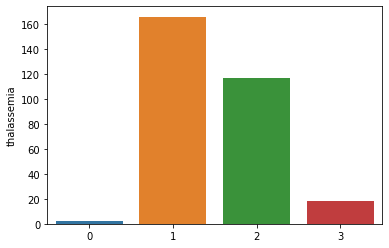

In [32]:
# BAR PLOT for the categorical Variables
for i in cat_var.columns:
    sns.barplot(x=cat_var[i].unique(),y=cat_var[i].value_counts())
    plt.show()

Inferences :<br/>
1. Most of them are male 
2. The chest pain is high
3. They have high BP
4. Rest ECG seems to be normal
5. CA is almost nil
6. The talassemia which is a blood disorder is 1 

In [33]:
# CHI SQUARE for the Categorical Variable 
from scipy.stats import chi2_contingency


In [34]:
print("For gender")
chi_check=[]
for i in cat_var.columns:
    if chi2_contingency(pd.crosstab(cat_var[i],cat_var["gender"]))[1]<0.05 :
        chi_check.append("Accept_null")
    else:
        chi_check.append("Reject_null")
new = pd.DataFrame()
new["col"]=cat_var.columns
new["chi"]=pd.DataFrame(chi_check)
new 

For gender


,col,chi
0,gender,Accept_null
1,chest_pain,Reject_null
2,fasting_blood_sugar,Reject_null
3,rest_ecg,Reject_null
4,exer_angina,Accept_null
5,slope,Reject_null
6,ca,Reject_null
7,thalassemia,Accept_null


In [35]:
print("For chestpain")
chi_check=[]
for i in cat_var.columns:
    if chi2_contingency(pd.crosstab(cat_var[i],cat_var["chest_pain"]))[1]<0.05 :
        chi_check.append("Accept_null")
    else:
        chi_check.append("Reject_null")
new = pd.DataFrame()
new["col"]=cat_var.columns
new["chi"]=pd.DataFrame(chi_check)
new 

For chestpain


,col,chi
0,gender,Reject_null
1,chest_pain,Accept_null
2,fasting_blood_sugar,Reject_null
3,rest_ecg,Reject_null
4,exer_angina,Accept_null
5,slope,Accept_null
6,ca,Accept_null
7,thalassemia,Accept_null


In [36]:
print("For fasting_blood_sugar")
chi_check=[]
for i in cat_var.columns:
    if chi2_contingency(pd.crosstab(cat_var[i],cat_var["fasting_blood_sugar"]))[1]<0.05 :
        chi_check.append("Accept_null")
    else:
        chi_check.append("Reject_null")
new = pd.DataFrame()
new["col"]=cat_var.columns
new["chi"]=pd.DataFrame(chi_check)
new 

For fasting_blood_sugar


,col,chi
0,gender,Reject_null
1,chest_pain,Reject_null
2,fasting_blood_sugar,Accept_null
3,rest_ecg,Reject_null
4,exer_angina,Reject_null
5,slope,Reject_null
6,ca,Reject_null
7,thalassemia,Reject_null


In [37]:
print("For rest_ecg")
chi_check=[]
for i in cat_var.columns:
    if chi2_contingency(pd.crosstab(cat_var[i],cat_var["rest_ecg"]))[1]<0.05 :
        chi_check.append("Accept_null")
    else:
        chi_check.append("Reject_null")
new = pd.DataFrame()
new["col"]=cat_var.columns
new["chi"]=pd.DataFrame(chi_check)
new 

For rest_ecg


,col,chi
0,gender,Reject_null
1,chest_pain,Reject_null
2,fasting_blood_sugar,Reject_null
3,rest_ecg,Accept_null
4,exer_angina,Reject_null
5,slope,Accept_null
6,ca,Reject_null
7,thalassemia,Reject_null


In [38]:
print("For exer_angina")
chi_check=[]
for i in cat_var.columns:
    if chi2_contingency(pd.crosstab(cat_var[i],cat_var["exer_angina"]))[1]<0.05 :
        chi_check.append("Accept_null")
    else:
        chi_check.append("Reject_null")
new = pd.DataFrame()
new["col"]=cat_var.columns
new["chi"]=pd.DataFrame(chi_check)
new 

For exer_angina


,col,chi
0,gender,Accept_null
1,chest_pain,Accept_null
2,fasting_blood_sugar,Reject_null
3,rest_ecg,Reject_null
4,exer_angina,Accept_null
5,slope,Accept_null
6,ca,Accept_null
7,thalassemia,Accept_null


In [39]:
print("For slope")
chi_check=[]
for i in cat_var.columns:
    if chi2_contingency(pd.crosstab(cat_var[i],cat_var["slope"]))[1]<0.05 :
        chi_check.append("Accept_null")
    else:
        chi_check.append("Reject_null")
new = pd.DataFrame()
new["col"]=cat_var.columns
new["chi"]=pd.DataFrame(chi_check)
new 

For slope


,col,chi
0,gender,Reject_null
1,chest_pain,Accept_null
2,fasting_blood_sugar,Reject_null
3,rest_ecg,Accept_null
4,exer_angina,Accept_null
5,slope,Accept_null
6,ca,Reject_null
7,thalassemia,Accept_null


In [40]:
print("For ca")
chi_check=[]
for i in cat_var.columns:
    if chi2_contingency(pd.crosstab(cat_var[i],cat_var["ca"]))[1]<0.05 :
        chi_check.append("Accept_null")
    else:
        chi_check.append("Reject_null")
new = pd.DataFrame()
new["col"]=cat_var.columns
new["chi"]=pd.DataFrame(chi_check)
new 

For ca


,col,chi
0,gender,Reject_null
1,chest_pain,Accept_null
2,fasting_blood_sugar,Reject_null
3,rest_ecg,Reject_null
4,exer_angina,Accept_null
5,slope,Reject_null
6,ca,Accept_null
7,thalassemia,Accept_null


In [41]:
print("For Thalassemia")
chi_check=[]
for i in cat_var.columns:
    if chi2_contingency(pd.crosstab(cat_var[i],cat_var["thalassemia"]))[1]<0.05 :
        chi_check.append("Accept_null")
    else:
        chi_check.append("Reject_null")
new = pd.DataFrame()
new["col"]=cat_var.columns
new["chi"]=pd.DataFrame(chi_check)
new 

For Thalassemia


,col,chi
0,gender,Accept_null
1,chest_pain,Accept_null
2,fasting_blood_sugar,Reject_null
3,rest_ecg,Reject_null
4,exer_angina,Accept_null
5,slope,Accept_null
6,ca,Accept_null
7,thalassemia,Accept_null


In [219]:
# Decomposing the model to avoid overfitting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

 # Model Fit 

In [200]:
# importing decision tree 

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=2,min_samples_split=4,min_samples_leaf=2)

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data = mm.fit_transform(data)


In [179]:
data_pca = pca.fit_transform(data)

In [205]:
data_pca = pd.DataFrame(data = data_pca, columns = ['pca1', 'pca2'])

In [206]:
x_train,x_test,y_train,y_test = train_test_split(data_pca,y_dep,test_size=0.3)

In [207]:
dt1 = dt.fit(x_train,y_train)

In [208]:
train_pred = dt1.predict(x_train)

In [209]:
from sklearn.metrics import accuracy_score,classification_report

In [210]:
acc = accuracy_score(y_train,train_pred)

In [211]:
acc

0.9622641509433962

In [212]:
test_pred = dt1.predict(x_test)

In [213]:
acc_test =  accuracy_score(y_test,test_pred)

In [214]:
acc_test

0.967032967032967

Inference :  The Accuracy level is 97% in the test data and in the training data is 99% 

In [215]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        96
           1       1.00      0.93      0.96       116

    accuracy                           0.96       212
   macro avg       0.96      0.97      0.96       212
weighted avg       0.97      0.96      0.96       212



In [218]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       1.00      0.94      0.97        49

    accuracy                           0.97        91
   macro avg       0.97      0.97      0.97        91
weighted avg       0.97      0.97      0.97        91



In [222]:
from sklearn import tree

In [223]:
text_representation = tree.export_text(dt)

In [224]:
print(text_representation)

|--- feature_0 <= -0.04
|   |--- class: 1
|--- feature_0 >  -0.04
|   |--- feature_0 <= 0.21
|   |   |--- class: 0
|   |--- feature_0 >  0.21
|   |   |--- class: 0



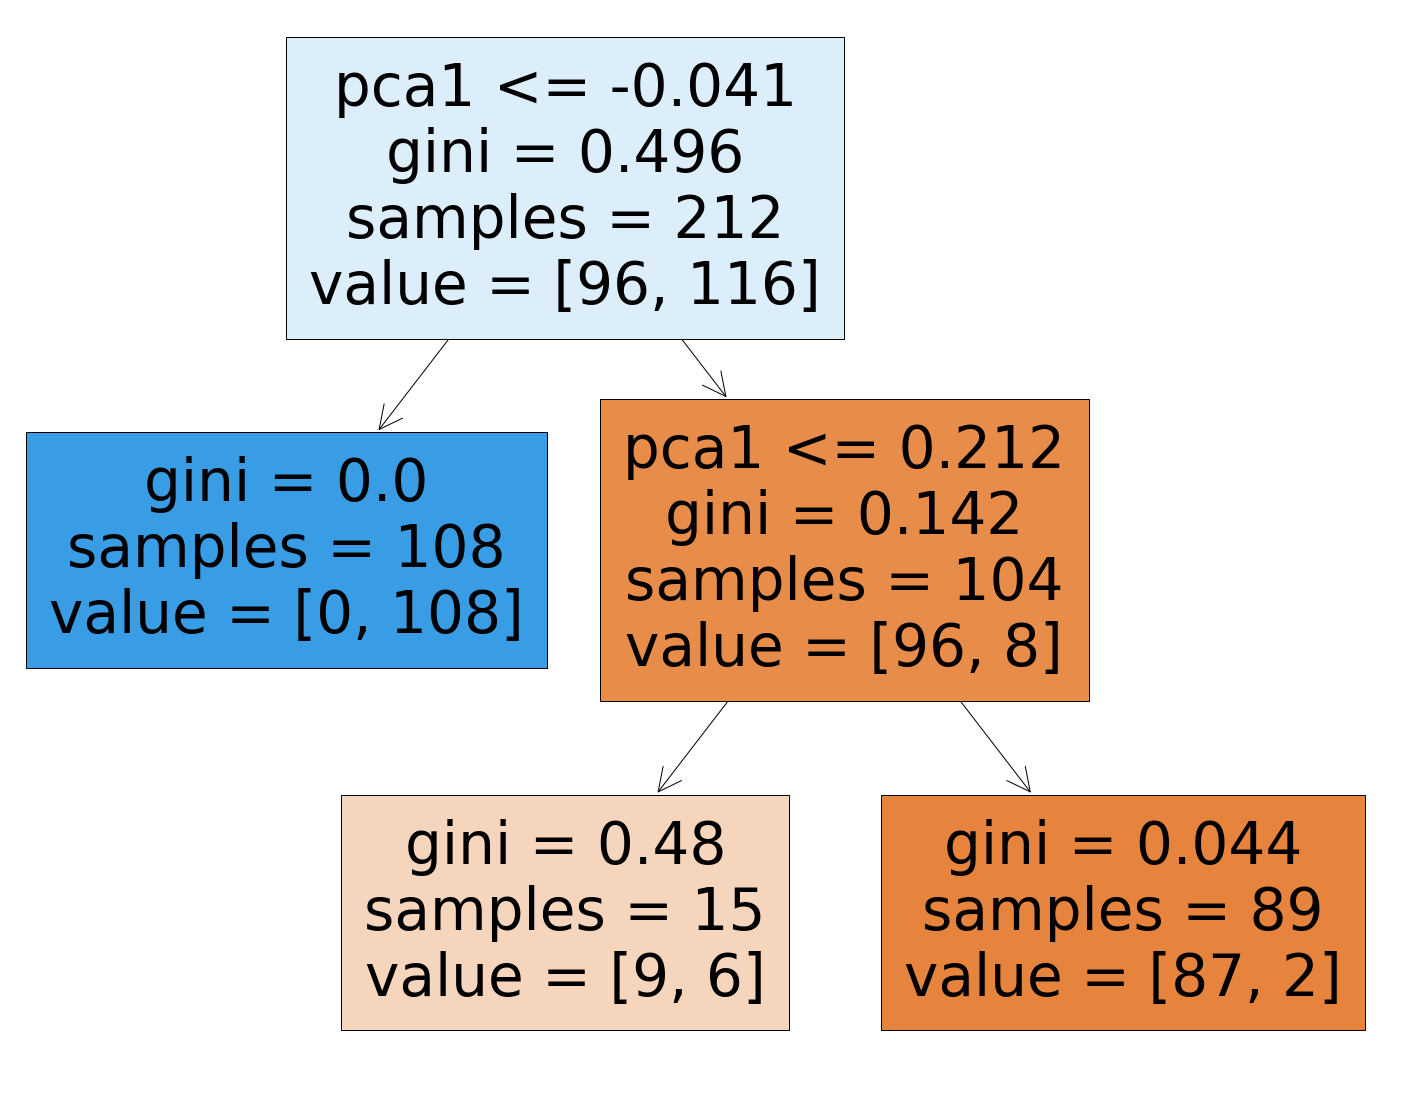

In [229]:
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(dt, feature_names=data_pca.columns, filled=True)